In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as io


class signal_mono: 
    pass
        
## on conviendra que les champs d'un signal_mono sont : 
##  signal.x  : les valeurs du signal 
##  signal.N= : le nombre d'échantillons 
##  signal.Fs : la frequence d'echantillonnage en Hz
##  signal.t : le vecteur des temps associé
## EXEMPLE D'APPLICATION :  plt.plot(signal.t,signal.x)





def normaliser_son_mono(x):
    M = np.max(abs(x)); ## la plus grande valeur absolue du signal
    return  x/M;   ### conversion automatique au format réel et normalisation 


def creer_signal(valeurs,Fs):
    out = signal_mono()
    out.x = normaliser_son_mono(valeurs)
    out.N= np.size(out.x)
    out.Fs=Fs
    out.t=np.arange(out.N)/Fs
    return out

def extraire(signal,t_min,t_max):
    condition = ( signal.t   < t_max )*( signal.t > t_min)
    out= signal_mono
    out.x = np.extract(condition,signal.x)
    out.t=np.extract(condition,signal.t)
    out.N= signal.N
    out.Fs=signal.Fs
    return out

def enregistrer_son(nom_fichier,signal,Fs):
    y=0.5*normaliser_son_mono(signal.x)  ### le facteur 0.5 pour éviter d'exploser les oreilles...
    scaled = np.round(32767*y)   ### passage en 16 bits
    newdata = scaled.astype(np.int16)   ### conversion en type int
    io.write(nom_fichier, Fs, newdata)   ### codage en wav

Part1
1)

In [52]:
def creer_signal_periodique(Phase, Gain, f0, t, Fs):
    signalData = np.zeros(t.size)
    
    for tIndex in range(0, t.size):
        time = tIndex/Fs

        for n in range (0, Gain.size):
            signalData[tIndex] += Gain[n] * np.cos(2*np.pi*(2*n + 1)*f0*time + Phase[n])
        
        # Pour former signal rect
        signalData[tIndex] *= (2/np.pi)
        signalData[tIndex] += 1/2
    
    
    signal = creer_signal(signalData, Fs)
    
    return signal

Part1 2)

In [61]:
def phase(N):
    #Phase = np.random.uniform(-np.pi, np.pi, N)
    Phase = np.zeros(N)
    return Phase

def gain(N):
    Gain = np.arange(N, dtype = np.float) # Must specify the type otherwise treated as decimal numbers
    for n in range(Gain.size):
        Gain[n] = ((-1)**n) / (2*n +1)
            
    return Gain

Part1 3)

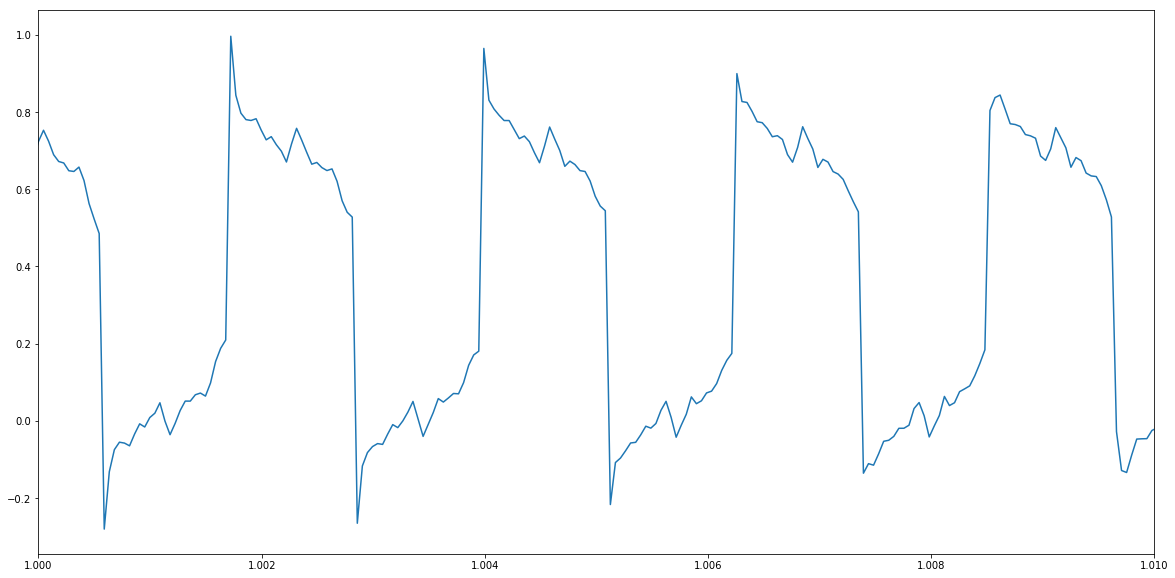

In [71]:
N = 20
f0 = 440
Fs = 22050
Ts = 1/Fs
t = np.arange(0, 4, Ts)
Gain = gain(N)
Phase = phase(N)

signalRectEven = creer_signal_periodique(Phase, Gain, f0, t, Fs)

plt.figure(1, figsize = (20, 10))
plt.plot(signalRectEven.t, signalRectEven.x)
plt.xlim(1, 1.01)

enregistrer_son("signal_periodique_P1_1", signalRectEven, Fs)

Part1 4)

In [72]:
def phase(N):
    Phase = np.random.uniform(0, 2/np.pi, N)

    return Phase

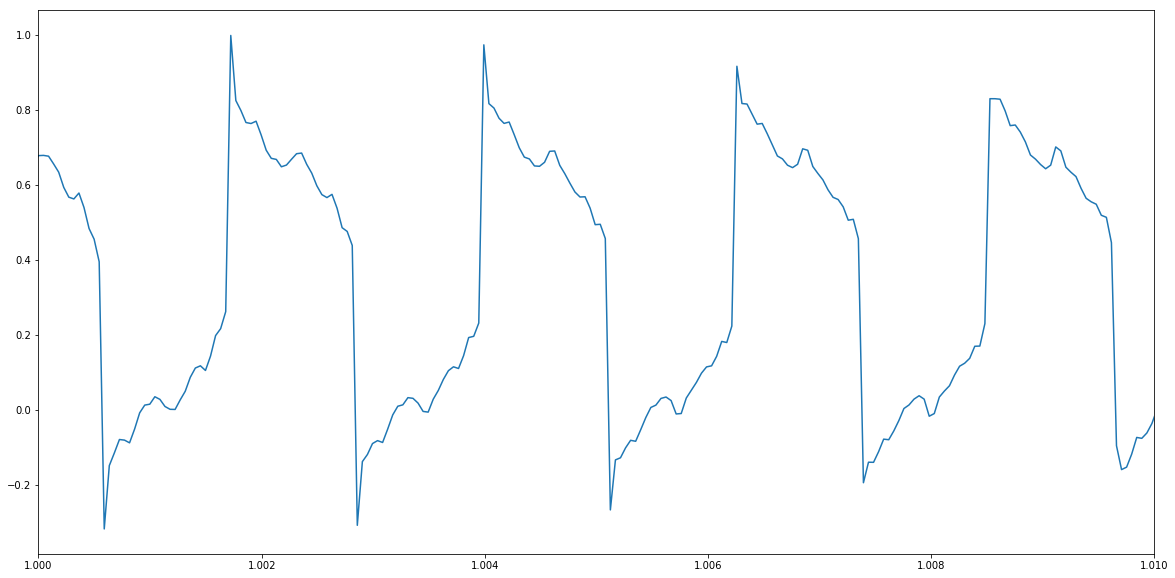

In [73]:
N = 20
f0 = 440
Fs = 22050
Ts = 1/Fs
t = np.arange(0, 4, Ts)
Gain = gain(N)
Phase = phase(N)

signalRectEven = creer_signal_periodique(Phase, Gain, f0, t, Fs)

plt.figure(1, figsize = (20, 10))
plt.plot(signalRectEven.t, signalRectEven.x)
plt.xlim(1, 1.01)

enregistrer_son("signal_periodique_P1_2", signalRectEven, Fs)

le graphe obtenu est globalement différent 
Il y a cependant des similitudes, visuellement on constate un "décalage progressif" des valeurs qui réitère à chaque créneau

Notre oreille n'est pas capable de distinguer la différence. Le son garde le même timbre 